In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

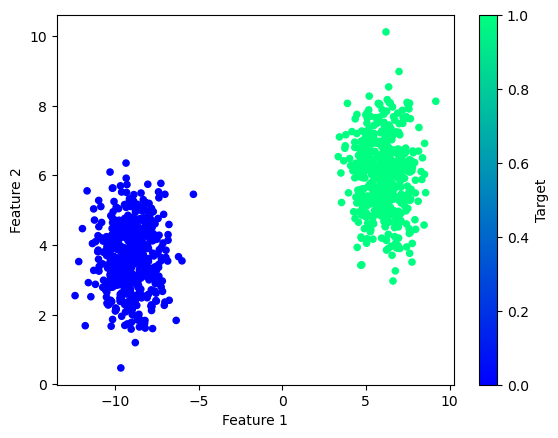

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()


In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [8]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.6839 - accuracy: 0.6040
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.8240
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6749 - accuracy: 0.8680
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.9213
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.9507
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.9707
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.9800
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6280 - accuracy: 0.9907
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.9973
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot: >

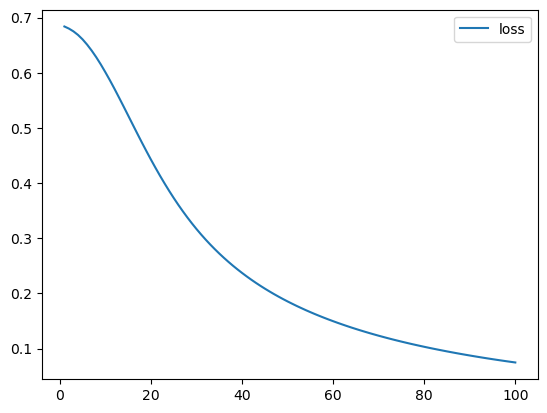

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot: >

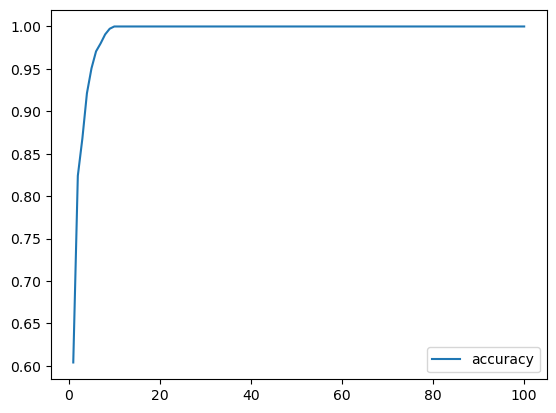

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0701 - accuracy: 1.0000 - 201ms/epoch - 25ms/step
Loss: 0.07014371454715729, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


1/1 [==============================] - 0s 110ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [15]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot: >

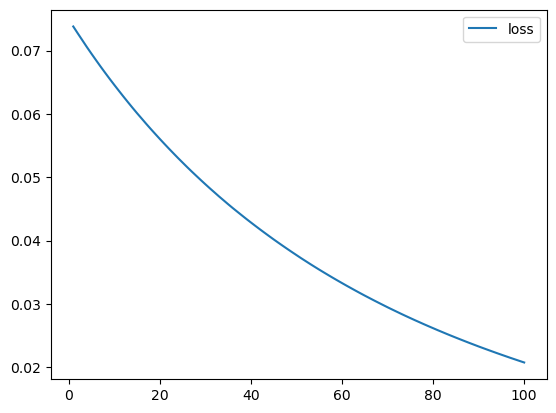

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot: >

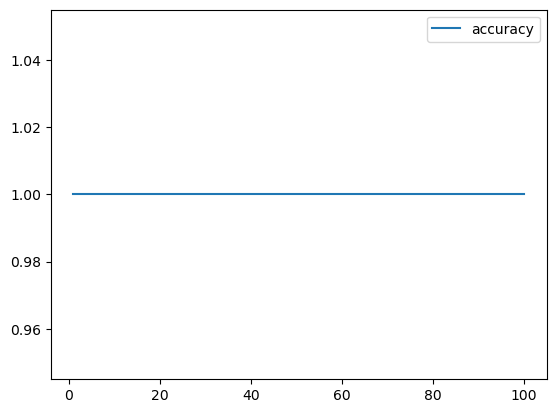

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


8/8 - 0s - loss: 0.0193 - accuracy: 1.0000 - 39ms/epoch - 5ms/step
Loss: 0.019289104267954826, Accuracy: 1.0


In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")


1/1 [==============================] - 0s 29ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot: xlabel='Feature 1', ylabel='Feature 2'>

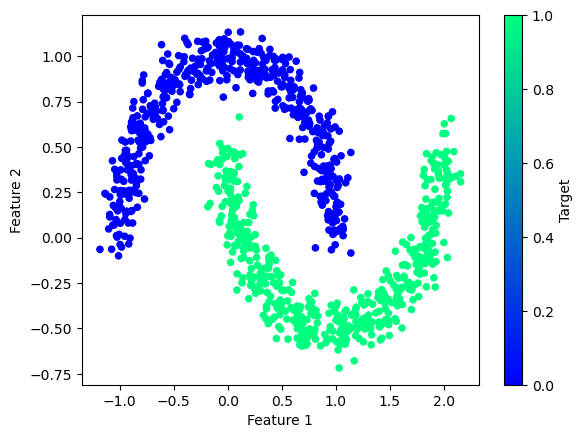

In [20]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [21]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [22]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0803 - accuracy: 0.5533
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9302 - accuracy: 0.5853
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.5987
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7739 - accuracy: 0.6147
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7277 - accuracy: 0.6240
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6333
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.6400
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.6480
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.6613
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6747
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8773
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.8773
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8787
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8813
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8813
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8813
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8840
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.8840
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.8853
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.8853
Epoch 93/100


<AxesSubplot: >

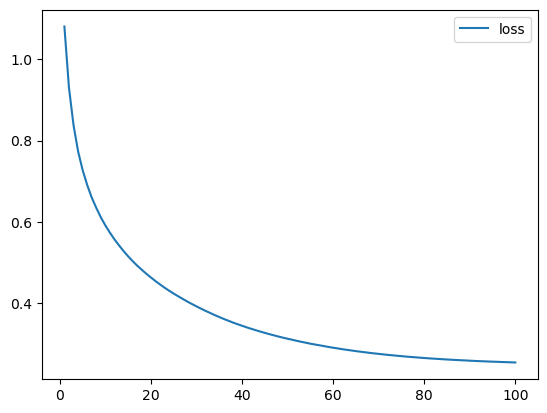

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot: >

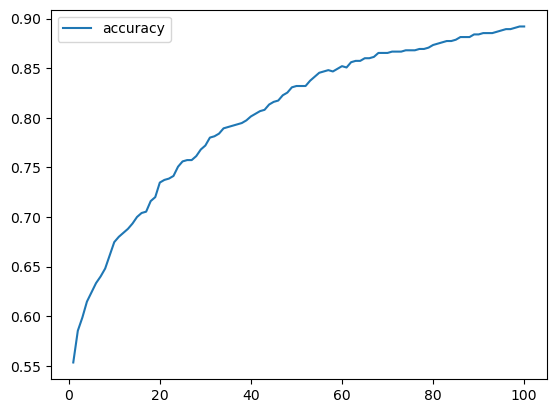

In [24]:
# Plot the accuracy 
history_df.plot(y="accuracy")

               

In [25]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()


In [26]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [27]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6104 - accuracy: 0.5320
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5774 - accuracy: 0.5760
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.6253
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5186 - accuracy: 0.6960
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7667
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7933
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8080
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4268 - accuracy: 0.8160
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4091 - accuracy: 0.8213
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8320
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1790 - accuracy: 0.9227
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1778 - accuracy: 0.9253
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1765 - accuracy: 0.9253
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1751 - accuracy: 0.9253
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9253
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1725 - accuracy: 0.9253
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9253
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9267
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1685 - accuracy: 0.9267
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1672 - accuracy: 0.9280
Epoch 93/100
